In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
file_path = r"/kaggle/input/social-media-sentiment-analysis-dataset/sentiment_analysis_socialmedia.csv"  
df = pd.read_csv(file_path)

In [3]:
df = df[["text", "sentiment"]].dropna()


In [4]:
df["sentiment"] = df["sentiment"].str.lower()

In [5]:
label_encoder = LabelEncoder()
df["sentiment"] = label_encoder.fit_transform(df["sentiment"])

In [6]:
X = df["text"]
y = df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding="post")

In [12]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

NameError: name 'embedding_matrix' is not defined

In [9]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
history = model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test),
                    epochs=50, batch_size=32)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4317 - loss: -0.3361 - val_accuracy: 0.3000 - val_loss: 0.1333
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4356 - loss: -0.8318 - val_accuracy: 0.3000 - val_loss: 0.1751
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4275 - loss: -0.8459 - val_accuracy: 0.3000 - val_loss: 0.2115
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4358 - loss: -1.4192 - val_accuracy: 0.3000 - val_loss: 0.2543
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4170 - loss: -1.4426 - val_accuracy: 0.3000 - val_loss: 0.2921
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4132 - loss: -1.4690 - val_accuracy: 0.3000 - val_loss: 0.3305
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4304 - loss: -1.0967 - val_accuracy: 0.3000 - val_loss: 0.3661
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3939 - loss: -2.2649 - val_accuracy: 0.30

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3221 - loss: -14.6520 
Test Loss: 5.18, Test Accuracy: 0.30


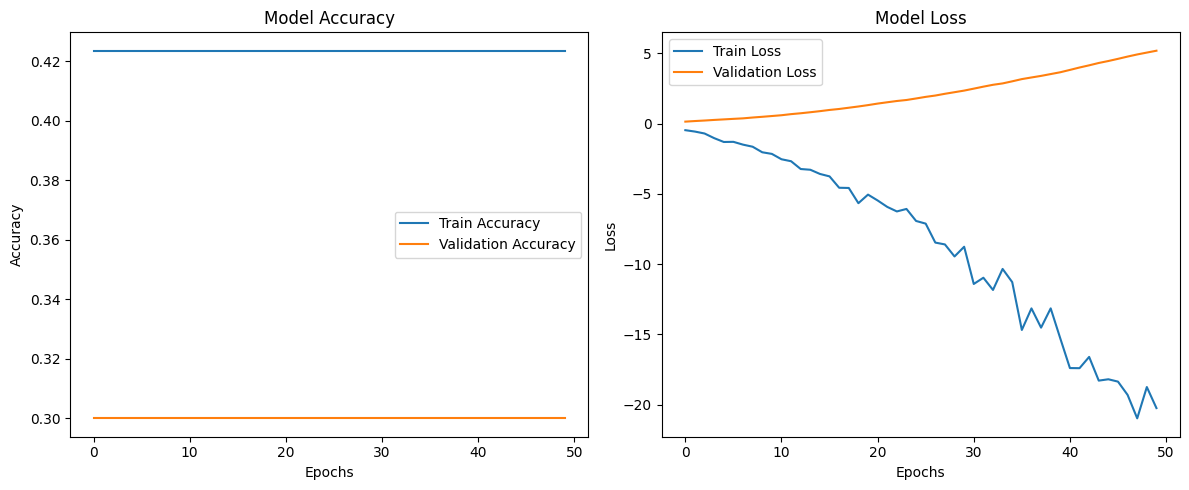

In [13]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss:.2f}, Test Accuracy: {accuracy:.2f}")

# Step 7: Visualize training performance
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [14]:

def predict_sentiment(text):
    # Clean and preprocess the user input
    text_seq = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_seq, maxlen=max_length, padding="post")

    # Predict sentiment
    prediction = model.predict(text_padded)

    # Decode prediction
    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    return sentiment

# Step 9: Test with user input
user_input = input("Enter a sentence to analyze sentiment: ")
sentiment = predict_sentiment(user_input)
print(f"The sentiment of the input text is: {sentiment}")

Enter a sentence to analyze sentiment:  fuck you


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
The sentiment of the input text is: Positive
